# Capstone Project -Week 02 - FINAL
## IBM Data Science Certificate
# 50 Munich Restaurants from Yelp Business Search Database
# Data Science Analysis


## 2. Jupyter Notebook Capstone Project - The Battle of neighborhoods - Week 02
## Source Code - Yelp Business Search Database 



In [1]:
# Import all relevant Python libraries

!pip install -U numpy
!pip install -U pandas
!pip install -U scipy
!pip install -U scikit-learn
!pip install -U imbalanced-learn

import pandas as pd, numpy as np        # pd - for manipulating data, open .csv and .json file/ np - for math operation
import sys, requests, lxml, re, json, urllib # library to handle requests, lxml, json url 
import time

! pip install yelp
! pip install yelpapi		      # install yelp api
               
! pip install matplotlib
import matplotlib.pyplot as plt       # to set graph, figsize
import matplotlib.cm as cm            # for handling utilities in color map
import matplotlib.colors as colors    # to generate colors

from sklearn.cluster import KMeans    # for generating cluster

!pip install beautifulsoup4
from bs4 import BeautifulSoup		# for scapping wikipedia wesite

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install seaborn
import seaborn as sns

! pip install plotly 
! pip install chart_studio
! pip install plotly --upgrade
import chart_studio
# chart_studio.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')

import plotly
import chart_studio.plotly as py
# plotly.tools.set_credentials_file(username='', api_key='')
import plotly.tools as tls
from plotly.graph_objs import 
%matplotlib inline

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

!pip install geopy
from geopy.geocoders import Nominatim 	# module to convert an address into latitude and longitude values

! pip install folium==0.12.0
import folium 				# generating maps 

! pip install glom
from glom import glom # library that allows us to use . notation to access property from a deeply nested object

Requirement already up-to-date: numpy in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (1.19.5)
Requirement already up-to-date: pandas in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (1.1.5)
     |████████████████████████████████| 25.9MB 28.3MB/s eta 0:00:01
  Found existing installation: scipy 1.5.3
    Uninstalling scipy-1.5.3:
      Successfully uninstalled scipy-1.5.3
     |████████████████████████████████| 22.3MB 30.6MB/s eta 0:00:01
     |████████████████████████████████| 307kB 16.8MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1
     |████████████████████████████████| 215kB 25.7MB/s eta 0:00:01
     |████████████████████████████████| 102kB 10.3MB/s ta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a5/1f/cb/cd71331e931f7b0e719d4319b8cc14e34faabac6946ff35aa4
Successfully built yelp
     |████████████████████████████████| 

In [2]:
# define yelp api key, authorization data
api_key='FM3e75vT6xALNvy1nHL8CkmZCTNuVd6s6bGyj47L_IHcLkmqjxk4xQ3yEToUkfC8uzwC-35U6e3VsPaE0hZu__dVpr1xJ1jc54KeB4DadFFPwS3X80VGA5ZLXZj1YHYx'
headers = {'Authorization': 'Bearer %s' % api_key}

url='https://api.yelp.com/v3/businesses/search'

# yelp api, businesses search - params, specifies relevant parameters - term, location, limit
# params term - restaurant, bars, cafes, italian, japan, china, location city, limit 5, 10, 20 max 50 
# limit is 50 restaurant entries, specified by yelp api
params = {'term':'restaurant','location':'Munich', 'limit':'50'}

# Making a get request to the API
req=requests.get(url, params=params, headers=headers)

# data json parsing
data = json.loads(req.text)


# proceed only if the status code is 200
print('Proceed only if the Request Object status code is 200', '\n')
print('The Request Object status code is {}'.format(req.status_code), '\n')
print('Data Type Request Object', '\n')
print(type(req), '\n') # print Data Type Request Object 
print('Data Type TEXT Request Object - STRING', '\n')
print(type(req.text), '\n') # printing text from req response 
print('Data Type JSON Request Object- METHOD', '\n')
print(type(req.json), '\n') # printing json from req response 
print('Data Type JSON parsing Request Object- DICTIONARY', '\n')
print(type(data),  '\n')


Proceed only if the Request Object status code is 200 

The Request Object status code is 200 

Data Type Request Object 

<class 'requests.models.Response'> 

Data Type TEXT Request Object - STRING 

<class 'str'> 

Data Type JSON Request Object- METHOD 

<class 'method'> 

Data Type JSON parsing Request Object- DICTIONARY 

<class 'dict'> 



In [66]:
# declare panda datframe, parse request object to json - businesses is data input from yelp api
df2 = pd.DataFrame.from_dict(req.json()['businesses'])

# display dimension, column names and column types for df2
print(len(df2), '\n') #Print how many rows
print(df2.columns, '\n') #Print column names
print(df2.dtypes, '\n') #Print column types

# Display df2 - notice columns are multi nested and unsorted
df2.head()

50 

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object') 

id               object 
alias            object 
name             object 
image_url        object 
is_closed        bool   
url              object 
review_count     int64  
categories       object 
rating           float64
coordinates      object 
transactions     object 
price            object 
location         object 
phone            object 
display_phone    object 
distance         float64
dtype: object 



,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,njLmw1IVbtOb2m-4TNr8ow,augustiner-keller-münchen-2,Augustiner-Keller,https://s3-media3.fl.yelpcdn.com/bphoto/5VtnFbuKYEn0_rhWE6khZQ/o.jpg,False,https://www.yelp.com/biz/augustiner-keller-m%C3%BCnchen-2?adjust_creative=5bAJVv1mbF3FArm5jDmM2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5bAJVv1mbF3FArm5jDmM2w,633,"[{'alias': 'bavarian', 'title': 'Bavarian'}, {'alias': 'beergarden', 'title': 'Beer Garden'}]",4.0,"{'latitude': 48.1435, 'longitude': 11.55195}",[],€€,"{'address1': 'Arnulfstr. 52', 'address2': None, 'address3': None, 'city': 'Munich', 'zip_code': '80335', 'country': 'DE', 'state': 'BY', 'display_address': ['Arnulfstr. 52', '80335 Munich', 'Germany']}",+4989594393,+49 89 594393,1440.274028
1,SbJxG5IbPsbzGcBl8ZL8uA,marbella-münchen,Marbella,https://s3-media2.fl.yelpcdn.com/bphoto/JwNNsGEkyuo_TZ85uOq7BA/o.jpg,False,https://www.yelp.com/biz/marbella-m%C3%BCnchen?adjust_creative=5bAJVv1mbF3FArm5jDmM2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5bAJVv1mbF3FArm5jDmM2w,38,"[{'alias': 'spanish', 'title': 'Spanish'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]",4.5,"{'latitude': 48.1538833, 'longitude': 11.5416787}",[],€€,"{'address1': 'Horemansstr. 30', 'address2': '', 'address3': None, 'city': 'Munich', 'zip_code': '80636', 'country': 'DE', 'state': 'BY', 'display_address': ['Horemansstr. 30', '80636 Munich', 'Germany']}",+498912779753,+49 89 12779753,129.674074
2,1b1SH21SQt_rY92gEZDKEg,neuhauser-augustiner-münchen,Neuhauser Augustiner,https://s3-media3.fl.yelpcdn.com/bphoto/zGP5G0m5Y4nAqWcdPNoP-Q/o.jpg,False,https://www.yelp.com/biz/neuhauser-augustiner-m%C3%BCnchen?adjust_creative=5bAJVv1mbF3FArm5jDmM2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5bAJVv1mbF3FArm5jDmM2w,36,"[{'alias': 'german', 'title': 'German'}]",4.5,"{'latitude': 48.1592, 'longitude': 11.5406}",[],€€,"{'address1': 'Hübnerstr. 23', 'address2': None, 'address3': None, 'city': 'Munich', 'zip_code': '80637', 'country': 'DE', 'state': 'BY', 'display_address': ['Hübnerstr. 23', '80637 Munich', 'Germany']}",+49891202130,+49 89 1202130,497.766512
3,8efWkJpnLBg2Uzww3Sp4ug,zapata-mexican-bar-münchen,Zapata Mexican Bar,https://s3-media2.fl.yelpcdn.com/bphoto/m4JVoWXDEgMiWq6YPXWBqg/o.jpg,False,https://www.yelp.com/biz/zapata-mexican-bar-m%C3%BCnchen?adjust_creative=5bAJVv1mbF3FArm5jDmM2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5bAJVv1mbF3FArm5jDmM2w,62,"[{'alias': 'mexican', 'title': 'Mexican'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}]",4.0,"{'latitude': 48.148284, 'longitude': 11.535622}",[],€€,"{'address1': 'Wilderich-Lang-Str. 4', 'address2': None, 'address3': None, 'city': 'Munich', 'zip_code': '80634', 'country': 'DE', 'state': 'BY', 'display_address': ['Wilderich-Lang-Str. 4', '80634 Munich', 'Germany']}",+49891665822,+49 89 1665822,896.565169
4,oNF_jG_WQP0WZ7BBZ-ylXg,yee-chino-restaurant-münchen,Yee Chino Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/x9Y7BkrjmQuuBtvPisvpaw/o.jpg,False,https://www.yelp.com/biz/yee-chino-restaurant-m%C3%BCnchen?adjust_creative=5bAJVv1mbF3FArm5jDmM2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5bAJVv1mbF3FArm5jDmM2w,49,"[{'alias': 'panasian', 'title': 'Pan Asian'}]",4.5,"{'latitude': 48.1632208, 'longitude': 11.5436741}",[],€€,"{'address1': 'Helene-Weber-Allee 19', 'address2': '', 'address3': '', 'city': 'Munich', 'zip_code': '80637', 'country': 'DE', 'state': 'BY', 'display_address': ['Helene-Weber-Allee 19', '80637 Munich', 'Germany']}",+498915988587,+49 89 15988587,928.266080


In [67]:
# normalize json to new dataframe - d1
d1 = pd.json_normalize(data["businesses"]) 
# d2 dataframe, with appropriate column names, json subcolumns coordinates.latitude / coordinates.longitude / location.display_address
# categories column is the only one still nested 
d2 = d1[['name','location.display_address','phone', 'categories', 'rating', 'review_count', 'coordinates.latitude','coordinates.longitude', 'price']]
# rename columns
d2.rename({'location.display_address': 'address', 'coordinates.latitude': 'latitude',
         'coordinates.longitude': 'longitude'}, axis=1, inplace=True)
# maximize column width to display appropriately nested json data in column - categories
pd.set_option("display.max_colwidth", -1)

d2.head()



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,name,address,phone,categories,rating,review_count,latitude,longitude,price
0,Augustiner-Keller,"[Arnulfstr. 52, 80335 Munich, Germany]",+4989594393,"[{'alias': 'bavarian', 'title': 'Bavarian'}, {'alias': 'beergarden', 'title': 'Beer Garden'}]",4.0,633,48.143500,11.551950,€€
1,Marbella,"[Horemansstr. 30, 80636 Munich, Germany]",+498912779753,"[{'alias': 'spanish', 'title': 'Spanish'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]",4.5,38,48.153883,11.541679,€€
2,Neuhauser Augustiner,"[Hübnerstr. 23, 80637 Munich, Germany]",+49891202130,"[{'alias': 'german', 'title': 'German'}]",4.5,36,48.159200,11.540600,€€
3,Zapata Mexican Bar,"[Wilderich-Lang-Str. 4, 80634 Munich, Germany]",+49891665822,"[{'alias': 'mexican', 'title': 'Mexican'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}]",4.0,62,48.148284,11.535622,€€
4,Yee Chino Restaurant,"[Helene-Weber-Allee 19, 80637 Munich, Germany]",+498915988587,"[{'alias': 'panasian', 'title': 'Pan Asian'}]",4.5,49,48.163221,11.543674,€€


In [68]:
# categories column, contains nested json data - we need to extract that and separate it to new columns
# d3 new df that contains only categories column 
d3 = d2
d3['cat'] = d2['categories']

# notice nested json data in categories column - which hasn't been normalized/flattened by previous json normailization 
# print(d3.columns, '\n')
d3.head()



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,address,phone,categories,rating,review_count,latitude,longitude,price,cat
0,Augustiner-Keller,"[Arnulfstr. 52, 80335 Munich, Germany]",+4989594393,"[{'alias': 'bavarian', 'title': 'Bavarian'}, {'alias': 'beergarden', 'title': 'Beer Garden'}]",4.0,633,48.143500,11.551950,€€,"[{'alias': 'bavarian', 'title': 'Bavarian'}, {'alias': 'beergarden', 'title': 'Beer Garden'}]"
1,Marbella,"[Horemansstr. 30, 80636 Munich, Germany]",+498912779753,"[{'alias': 'spanish', 'title': 'Spanish'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]",4.5,38,48.153883,11.541679,€€,"[{'alias': 'spanish', 'title': 'Spanish'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]"
2,Neuhauser Augustiner,"[Hübnerstr. 23, 80637 Munich, Germany]",+49891202130,"[{'alias': 'german', 'title': 'German'}]",4.5,36,48.159200,11.540600,€€,"[{'alias': 'german', 'title': 'German'}]"
3,Zapata Mexican Bar,"[Wilderich-Lang-Str. 4, 80634 Munich, Germany]",+49891665822,"[{'alias': 'mexican', 'title': 'Mexican'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}]",4.0,62,48.148284,11.535622,€€,"[{'alias': 'mexican', 'title': 'Mexican'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}]"
4,Yee Chino Restaurant,"[Helene-Weber-Allee 19, 80637 Munich, Germany]",+498915988587,"[{'alias': 'panasian', 'title': 'Pan Asian'}]",4.5,49,48.163221,11.543674,€€,"[{'alias': 'panasian', 'title': 'Pan Asian'}]"


In [69]:
# flatten categories/cat column - declare new column al1, al2, al3 that contain separated nested categories data 
df1 = (
    pd.DataFrame(d3["cat"]
    .apply(pd.Series))
)
# name df1 columns
df1.columns = ['al1', 'al2', 'al3']

# check df1 dimension - 50 throughout this assignment - remember limit 50 - yelp api
print(len(df1), '\n') #Print how many rows
print(df1.columns, '\n') #Print column names
print(df1.dtypes, '\n') #Print column types

# we have for df1, categories with same terms but also different - still nested data in columns
df1.head(10)


50 

Index(['al1', 'al2', 'al3'], dtype='object') 

al1    object
al2    object
al3    object
dtype: object 



,al1,al2,al3
0,"{'alias': 'bavarian', 'title': 'Bavarian'}","{'alias': 'beergarden', 'title': 'Beer Garden'}",NaN
1,"{'alias': 'spanish', 'title': 'Spanish'}","{'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}",NaN
2,"{'alias': 'german', 'title': 'German'}",NaN,NaN
3,"{'alias': 'mexican', 'title': 'Mexican'}","{'alias': 'cocktailbars', 'title': 'Cocktail Bars'}",NaN
4,"{'alias': 'panasian', 'title': 'Pan Asian'}",NaN,NaN
5,"{'alias': 'vietnamese', 'title': 'Vietnamese'}",NaN,NaN
6,"{'alias': 'thai', 'title': 'Thai'}",NaN,NaN
7,"{'alias': 'italian', 'title': 'Italian'}",NaN,NaN
8,"{'alias': 'vietnamese', 'title': 'Vietnamese'}","{'alias': 'wok', 'title': 'Wok'}",NaN
9,"{'alias': 'german', 'title': 'German'}","{'alias': 'divebars', 'title': 'Dive Bars'}",NaN


In [70]:
# json flattening dataframe columns, al1, al2, al3 - new columns with nested data
json_struct = json.loads(df1.to_json(orient="records"))    
df_flat = pd.json_normalize(json_struct) #use pd.io.json
# df1.head()
print(len(df_flat), '\n') # Print how many rows, check dimension 50
# display categories dataframe, notice similarites and differences, so entry0 Bavarian/Beergarden, entry1 Spanish/Tapas, entry2 Panasian...
df_flat.head(3)


50 



,al3,al1.alias,al1.title,al2.alias,al2.title,al2,al3.alias,al3.title
0,NaN,bavarian,Bavarian,beergarden,Beer Garden,NaN,NaN,NaN
1,NaN,spanish,Spanish,tapasmallplates,Tapas/Small Plates,NaN,NaN,NaN
2,NaN,german,German,NaN,NaN,NaN,NaN,NaN


In [71]:

# al1.title, al2.title -  columns with relevant data
df_flat2 = df_flat[['al1.title', 'al2.title', 'al3.title']]
# cat1, cat2, cat3 - 3 distinct categories to describe restaurants - mainly nationality and style
# rename to cat 1, cat2
df_flat2.columns = ['cat1', 'cat2', 'cat3']
df_flat2.insert(0, 'catflag', df_flat2.index + 0)


# catflag - new column with multiple conditions - to uniqly categroize restaurants - 
conditions = [
    (df_flat2['cat1'] == 'Spanish'),
    (df_flat2['cat1'] == 'Bavarian'),
    (df_flat2['cat1'] == 'Pan Asian'),
    (df_flat2['cat2'] == 'Vietnamese')]
choices = ['Continental', 'Continental', 'Continental', 'Asian']
df_flat2['catflag'] = np.select(conditions, choices, default='Conditional Value 1')

df_flat2.head(20)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,catflag,cat1,cat2,cat3
0,Continental,Bavarian,Beer Garden,NaN
1,Continental,Spanish,Tapas/Small Plates,NaN
2,Conditional Value 1,German,NaN,NaN
3,Conditional Value 1,Mexican,Cocktail Bars,NaN
4,Continental,Pan Asian,NaN,NaN
5,Conditional Value 1,Vietnamese,NaN,NaN
6,Conditional Value 1,Thai,NaN,NaN
7,Conditional Value 1,Italian,NaN,NaN
8,Conditional Value 1,Vietnamese,Wok,NaN
9,Conditional Value 1,German,Dive Bars,NaN


In [75]:

# merge d2 with df_flat2
dff = pd.concat([d2, df_flat2], axis=1)
dff1 = dff[['cat1', 'cat2', 'cat3']]

count1 = dff1['cat1'].value_counts()
count2 = dff1['cat2'].value_counts()
count3 = dff1['cat3'].value_counts()

# check column df_flat2 size 50 matches  
print('Number of Rows df', '\n')
print(len(df_flat2), '\n')

# Frequency of occurencies for cat1, cat2, cat3 - Categories Restaurants
# cat1 is nationality, cat2 is style, cat3 is type
print('Freq of occurencies cat1', '\n')
print(count1, '\n')
print('Freq of occurencies cat2', '\n')
print(count2, '\n')
print('Freq of occurencies cat3', '\n')
print(count3)

dff3=dff

dff.head()

Number of Rows df 

50 

Freq of occurencies cat1 

Italian               7
Bavarian              5
Greek                 4
German                4
Pan Asian             3
Vietnamese            3
Chinese               3
Mexican               3
Cafes                 2
Barbeque              2
Thai                  2
Spanish               2
Breakfast & Brunch    1
Cocktail Bars         1
Kebab                 1
Tapas Bars            1
Peruvian              1
Korean                1
International         1
Ramen                 1
Pancakes              1
Austrian              1
Name: cat1, dtype: int64 

Freq of occurencies cat2 

Steakhouses               2
Seafood                   1
Cocktail Bars             1
Bars                      1
Tapas/Small Plates        1
Mediterranean             1
Dive Bars                 1
Bavarian                  1
Breakfast & Brunch        1
Brewpubs                  1
Tapas Bars                1
Smokehouse                1
Cafes                     1
Au

,name,address,phone,categories,rating,review_count,latitude,longitude,price,cat,catflag,cat1,cat2,cat3
0,Augustiner-Keller,"[Arnulfstr. 52, 80335 Munich, Germany]",+4989594393,"[{'alias': 'bavarian', 'title': 'Bavarian'}, {'alias': 'beergarden', 'title': 'Beer Garden'}]",4.0,633,48.143500,11.551950,€€,"[{'alias': 'bavarian', 'title': 'Bavarian'}, {'alias': 'beergarden', 'title': 'Beer Garden'}]",Continental,Bavarian,Beer Garden,NaN
1,Marbella,"[Horemansstr. 30, 80636 Munich, Germany]",+498912779753,"[{'alias': 'spanish', 'title': 'Spanish'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]",4.5,38,48.153883,11.541679,€€,"[{'alias': 'spanish', 'title': 'Spanish'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]",Continental,Spanish,Tapas/Small Plates,NaN
2,Neuhauser Augustiner,"[Hübnerstr. 23, 80637 Munich, Germany]",+49891202130,"[{'alias': 'german', 'title': 'German'}]",4.5,36,48.159200,11.540600,€€,"[{'alias': 'german', 'title': 'German'}]",Conditional Value 1,German,NaN,NaN
3,Zapata Mexican Bar,"[Wilderich-Lang-Str. 4, 80634 Munich, Germany]",+49891665822,"[{'alias': 'mexican', 'title': 'Mexican'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}]",4.0,62,48.148284,11.535622,€€,"[{'alias': 'mexican', 'title': 'Mexican'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}]",Conditional Value 1,Mexican,Cocktail Bars,NaN
4,Yee Chino Restaurant,"[Helene-Weber-Allee 19, 80637 Munich, Germany]",+498915988587,"[{'alias': 'panasian', 'title': 'Pan Asian'}]",4.5,49,48.163221,11.543674,€€,"[{'alias': 'panasian', 'title': 'Pan Asian'}]",Continental,Pan Asian,NaN,NaN


In [76]:
# dff is the final dataframe containing all relevant required columns to work with data science tools 
# drop categories column, to classify Munich Restaurants using appropriate Python Data Science Tools 
dff.drop('categories', inplace=True, axis=1)
dff.drop('cat', inplace=True, axis=1)
# insert incremental identifier column for data science tools - used later for plotting data
dff.insert(0, 'ID', dff.index + 0)
# declare CAT1
CAT1=dff['cat1']

# Replace NaN entries with empty spaces
dff = dff.fillna('')
# Sort dff Alphabetically - Column Name - Display all dff
dff.sort_values(by=['name'], ascending=True)

,ID,name,address,phone,rating,review_count,latitude,longitude,price,catflag,cat1,cat2,cat3
17,17,AMIGOS RESTAURANTE,"[Dachauer Str. 153, 80335 Munich, Germany]",+498918985117,5.0,2,48.153812,11.553989,,Conditional Value 1,Mexican,American (Traditional),
35,35,AOI,"[Volkartstr. 22, 80634 Munich, Germany]",+498918008880,4.0,5,48.155570,11.534390,,Conditional Value 1,Ramen,,
20,20,Al Paladino,"[Heimeranplatz 1, 80999 Munich, Germany]",+49895025657,4.5,73,48.133400,11.534600,€€,Conditional Value 1,Italian,,
5,5,An An,"[Elvirastr. 12, 80636 Munich, Germany]",+498955286459,5.0,12,48.149020,11.542900,,Conditional Value 1,Vietnamese,,
12,12,Asia Imbiss Feinkost,"[Leonrodstr. 67, 80636 Munich, Germany]",+49891292705,5.0,4,48.157940,11.543960,,Continental,Pan Asian,,
11,11,Augustiner Bräustuben,"[Landsberger Str. 19, 80339 Munich, Germany]",+4989507047,4.0,417,48.139120,11.545660,€€,Conditional Value 1,German,Bavarian,Gastropubs
0,0,Augustiner-Keller,"[Arnulfstr. 52, 80335 Munich, Germany]",+4989594393,4.0,633,48.143500,11.551950,€€,Continental,Bavarian,Beer Garden,
32,32,Café Gollier,"[Gollierstr. 36, 80339 Munich, Germany]",+498920188886,5.0,8,48.135810,11.540820,€,Conditional Value 1,Cafes,Breakfast & Brunch,
49,49,Condesa,"[Münchner Freiheit 6, 80802 Munich, Germany]",+4917620227136,4.0,125,48.162187,11.587176,€,Conditional Value 1,Mexican,,
25,25,Drunken Cow Bar & Grill,"[Gabelsbergerstr. 58, 80333 Munich, Germany]",+498954356230,4.0,24,48.149750,11.560920,€€€,Conditional Value 1,Cocktail Bars,Steakhouses,Burgers


In [77]:
# dff1.head()
df_flat4=dff1
# df_flat4.head()
dff2=dff
dff1.head(2)

,cat1,cat2,cat3
0,Bavarian,Beer Garden,NaN
1,Spanish,Tapas/Small Plates,NaN


In [78]:

# Extract from dff1 - cat 1/2/3 Columns all relevant categroisation information
df_flat4['fl1'] = dff1.cat1.str.extract(r'\b(\w+)$', expand=True)
df_flat4['fl2'] = dff1.cat2.str.extract(r'\b(\w+)$', expand=True)
df_flat4['fl3'] = dff1.cat3.str.extract(r'\b(\w+)$', expand=True)
df_flat4 = dff1.fillna('')


# New CAT Column to store all previously extracted - relevant categroisation information
df_flat4['CAT'] = df_flat4['cat1'] +' - '+ df_flat4['cat2']+' - '+ df_flat4['cat3']
df_flat4.head(10)



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,cat1,cat2,cat3,fl1,fl2,fl3,CAT
0,Bavarian,Beer Garden,,Bavarian,Garden,,Bavarian - Beer Garden -
1,Spanish,Tapas/Small Plates,,Spanish,Plates,,Spanish - Tapas/Small Plates -
2,German,,,German,,,German - -
3,Mexican,Cocktail Bars,,Mexican,Bars,,Mexican - Cocktail Bars -
4,Pan Asian,,,Asian,,,Pan Asian - -
5,Vietnamese,,,Vietnamese,,,Vietnamese - -
6,Thai,,,Thai,,,Thai - -
7,Italian,,,Italian,,,Italian - -
8,Vietnamese,Wok,,Vietnamese,Wok,,Vietnamese - Wok -
9,German,Dive Bars,,German,Bars,,German - Dive Bars -


In [79]:
C1=df_flat4['CAT']
# Assign C1 - to category column - which now contains all categorization paramters
dff2['category']= C1
dff2.drop(['price', 'catflag', 'cat1','cat2', 'cat3'], axis=1, inplace=True)
# Sort dff Alphabetically - Column Name
dff2.sort_values(by=['name'], ascending=True)
dff2.head(50)

,ID,name,address,phone,rating,review_count,latitude,longitude,category
0,0,Augustiner-Keller,"[Arnulfstr. 52, 80335 Munich, Germany]",+4989594393,4.0,633,48.143500,11.551950,Bavarian - Beer Garden -
1,1,Marbella,"[Horemansstr. 30, 80636 Munich, Germany]",+498912779753,4.5,38,48.153883,11.541679,Spanish - Tapas/Small Plates -
2,2,Neuhauser Augustiner,"[Hübnerstr. 23, 80637 Munich, Germany]",+49891202130,4.5,36,48.159200,11.540600,German - -
3,3,Zapata Mexican Bar,"[Wilderich-Lang-Str. 4, 80634 Munich, Germany]",+49891665822,4.0,62,48.148284,11.535622,Mexican - Cocktail Bars -
4,4,Yee Chino Restaurant,"[Helene-Weber-Allee 19, 80637 Munich, Germany]",+498915988587,4.5,49,48.163221,11.543674,Pan Asian - -
5,5,An An,"[Elvirastr. 12, 80636 Munich, Germany]",+498955286459,5.0,12,48.149020,11.542900,Vietnamese - -
6,6,Rüen Thong,"[Thorwaldsenstr. 19, 80335 Munich, Germany]",+498912715461,4.5,33,48.150960,11.548670,Thai - -
7,7,Risotto Ristorante,"[Hirschgartenallee 38, 80639 Munich, Germany]",+498917095709,4.5,15,48.153960,11.507260,Italian - -
8,8,Phó,"[Nymphenburger Str. 70, 80335 Munich, Germany]",+498912738768,4.5,28,48.149813,11.548280,Vietnamese - Wok -
9,9,Malzraum,"[Artilleriestr. 5, 80636 Munich, Germany]",+4989187997,4.5,21,48.156370,11.540220,German - Dive Bars -


<AxesSubplot:title={'center':'Restaurants - Category 1'}>

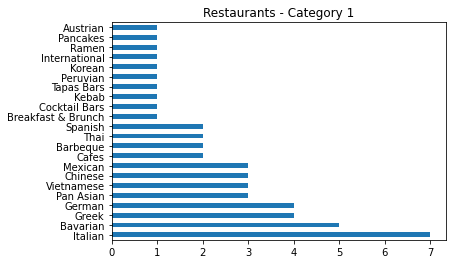

In [116]:
dff3['cat1'].value_counts()[:30].plot(kind='barh', title='Restaurants - Category 1')

<AxesSubplot:title={'center':'Restaurants - Category 2'}>

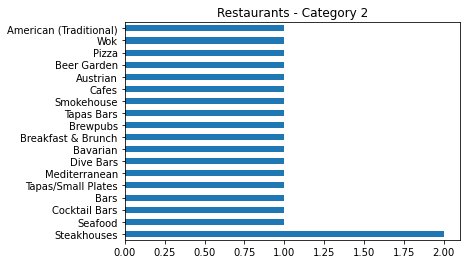

In [118]:
dff3['cat2'].value_counts()[:30].plot(kind='barh', title='Restaurants - Category 2')

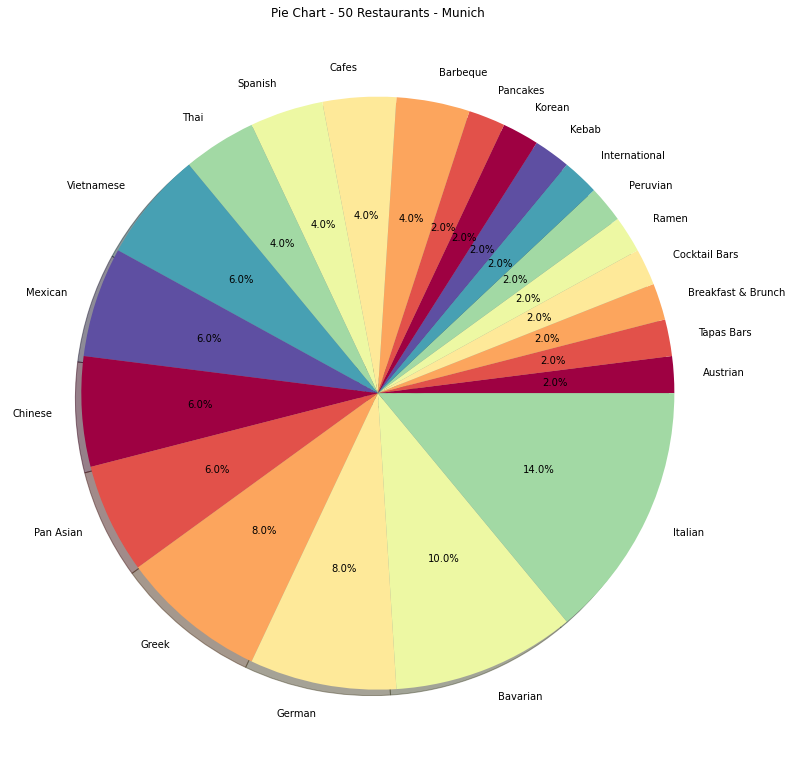

In [80]:
# pie chart
# import libraries
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

from collections import Counter

# declare categories column
my_cat1 =dff3['cat1']

title_type = dff3.groupby('cat1').agg('count')

# Pie Chart - matplotlib
type_labels = title_type.ID.sort_values().index 
type_counts = title_type.ID.sort_values()
plt.figure(1, figsize=(50,30)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(the_grid[0, 1], aspect=1, title='Pie Chart - 50 Restaurants - Munich')
type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()



Rating values are 
 4.5    0.60
4.0    0.32
5.0    0.08
Name: rating, dtype: float64


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 16., 30.,  4.]),
 array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <BarContainer object of 10 artists>)

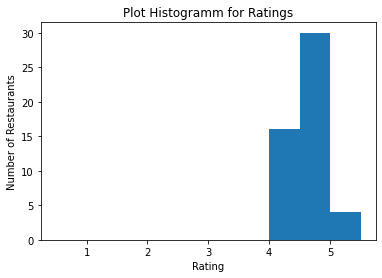

In [81]:
# histogram graph to diplay Rating vs Nr of Restaurants
rat1 = dff['rating'] 

# Rating Percentages
# Rating Values 4,5 (64%) - 4,0 (28%) - 5,0 (8%)
print('Rating values are', '\n', rat1.value_counts(normalize=True))

plt.title("Plot Histogramm for Ratings")
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')

plt.hist(rat1, range=(0.5, 5.5), bins=10)


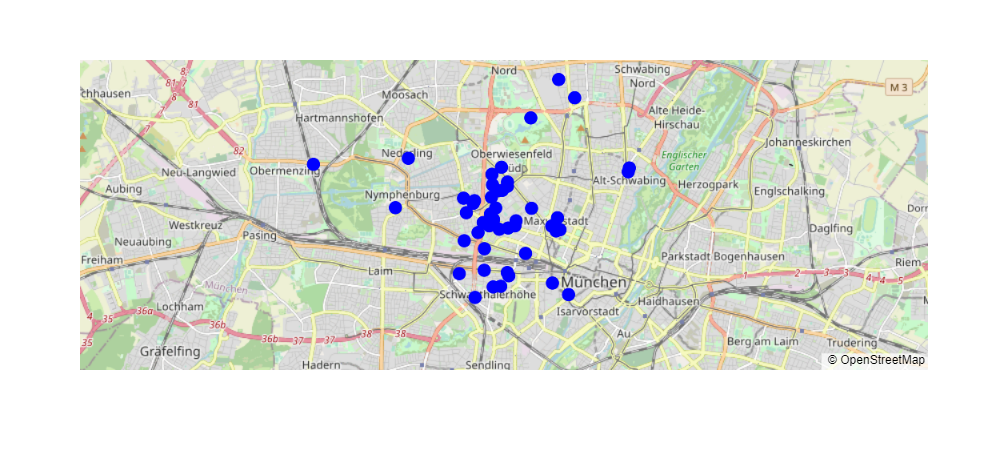

In [82]:
# Create interactive plotly express map to display 50 restaurants in Munich, with following data:
# name lat, long, address, category, review count

import plotly.express as px
fig = px.scatter_mapbox(dff2, lat="latitude", lon="longitude", 
                        hover_name='name', hover_data=['address', 'category', 'review_count'], zoom=11, size_max=40)
fig.update_layout(mapbox_style="open-street-map")
fig.update_traces(marker=dict(size=14, color='blue'))
fig.show()